In [1]:
import numpy as np 
import pandas as pd 
import warnings
import pickle
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import style

In [47]:
df=pd.read_excel("IDRS_Jobs.xlsx")
df.head()

SEND_SQL SEND_DATABASE RECEIVE_DATABASE   DEST TRANS_STATUS  \
0  F5203001         ITCNS            ITIDW  ITIDW          RDY   
1  F5203001         ITCNS            ITIDW  ITIDW          RDY   
2  F5203001         ITCNS            ITIDW  ITIDW          RDY   
3  F5203001         ITCNS            ITIDW  ITIDW          RDY   
4  F5203001         ITCNS            ITIDW  ITIDW          RDY   

         SEND_DATE_UTC        SEND_DATE_LOC SEND_UTC_OFFSET  SEND_DATA_ROW  \
0  2020-02-24 11:08:21  2020-02-24 11:08:21          +00:00        1668478   
1  2020-02-25 00:07:17  2020-02-25 00:07:17          +00:00        1747315   
2  2020-02-25 11:06:49  2020-02-25 11:06:49          +00:00        1956894   
3  2020-02-26 00:07:03  2020-02-26 00:07:03          +00:00        1775215   
4  2020-02-26 11:09:23  2020-02-26 11:09:23          +00:00        1863952   

   SEND_RECORD  ...  SEND_BU REC_BU SEND_COUNTRY REC_COUNTRY  \
0      1668655  ...      NaN    NaN          NaN         NaN   
1      1747492  ...      NaN    NaN          NaN         NaN   
2      1957071  ...      NaN    NaN          NaN         NaN   
3      1775392  ...      NaN    NaN          NaN         NaN   
4      1864129  ...      NaN    NaN          NaN         NaN   

      RECEIVE_DATE_UTC     RECEIVE_DATE_LOC  REC_UTC_OFFSET  BATCH_NAME  \
0  2020-02-24 11:15:59  2020-02-24 11:15:59          +00:00       ITIDW   
1  2020-02-25 00:11:02  2020-02-25 00:11:02          +00:00       ITIDW   
2  2020-02-25 11:13:32  2020-02-25 11:13:32          +00:00       ITIDW   
3  2020-02-26 00:14:42  2020-02-26 00:14:42          +00:00       ITIDW   
4  2020-02-26 11:19:33  2020-02-26 11:19:33          +00:00       ITIDW   

            BATCH_DATE SIZE_IN_MB  
0  2020-02-24 11:19:21     952.79  
1  2020-02-25 00:14:23     953.46  
2  2020-02-25 11:16:59     952.80  
3  2020-02-26 00:17:49     953.62  
4  2020-02-26 11:23:09     953.11  

[5 rows x 25 columns]

In [48]:
df.columns

Index(['SEND_SQL', 'SEND_DATABASE', 'RECEIVE_DATABASE', 'DEST', 'TRANS_STATUS',
       'SEND_DATE_UTC', 'SEND_DATE_LOC', 'SEND_UTC_OFFSET', 'SEND_DATA_ROW',
       'SEND_RECORD', 'SEND_VOLUME', 'SEND_IDRS_NODE', 'REC_IDRS_NODE',
       'SEND_PRODUCT', 'REC_PRODUCT', 'SEND_BU', 'REC_BU', 'SEND_COUNTRY',
       'REC_COUNTRY', 'RECEIVE_DATE_UTC', 'RECEIVE_DATE_LOC', 'REC_UTC_OFFSET',
       'BATCH_NAME', 'BATCH_DATE', 'SIZE_IN_MB'],
      dtype='object')

In [49]:
df.drop(["DEST", 
         "SEND_UTC_OFFSET", 
         "SEND_BU","REC_BU",
         "SEND_COUNTRY",
         "REC_COUNTRY",
         "REC_UTC_OFFSET",
         "SEND_DATE_LOC",
         "REC_IDRS_NODE",
         "SEND_DATABASE",
         "RECEIVE_DATABASE",
         "RECEIVE_DATE_LOC",
         "TRANS_STATUS",
         "SEND_DATE_UTC",
         "SEND_PRODUCT",
         "REC_PRODUCT",
         "RECEIVE_DATE_UTC",
         "SEND_IDRS_NODE",
         "BATCH_NAME"],axis=1,inplace=True)

In [50]:
df.head()

SEND_SQL  SEND_DATA_ROW  SEND_RECORD  SEND_VOLUME           BATCH_DATE  \
0  F5203001        1668478      1668655    999073690  2020-02-24 11:19:21   
1  F5203001        1747315      1747492    999776344  2020-02-25 00:14:23   
2  F5203001        1956894      1957071    999086684  2020-02-25 11:16:59   
3  F5203001        1775215      1775392    999939481  2020-02-26 00:17:49   
4  F5203001        1863952      1864129    999410953  2020-02-26 11:23:09   

   SIZE_IN_MB  
0      952.79  
1      953.46  
2      952.80  
3      953.62  
4      953.11

In [51]:
df.describe()

SEND_DATA_ROW   SEND_RECORD   SEND_VOLUME  SIZE_IN_MB
count   5.670000e+02  5.670000e+02  5.670000e+02  567.000000
mean    1.246013e+06  1.246161e+06  7.914326e+08  754.768765
std     5.708210e+05  5.708354e+05  2.449444e+08  233.596943
min     1.744890e+05  1.745710e+05  1.190081e+08  113.490000
25%     7.865835e+05  7.867130e+05  6.181217e+08  589.490000
50%     1.168447e+06  1.168529e+06  9.277654e+08  884.790000
75%     1.707912e+06  1.708088e+06  9.994215e+08  953.125000
max     2.470076e+06  2.470253e+06  9.999921e+08  953.670000

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
SEND_SQL         567 non-null object
SEND_DATA_ROW    567 non-null int64
SEND_RECORD      567 non-null int64
SEND_VOLUME      567 non-null int64
BATCH_DATE       567 non-null object
SIZE_IN_MB       567 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 26.7+ KB


In [53]:
print(df.shape)
print(df.size)

(567, 6)
3402


In [54]:
df

SEND_SQL  SEND_DATA_ROW  SEND_RECORD  SEND_VOLUME           BATCH_DATE  \
0    F5203001        1668478      1668655    999073690  2020-02-24 11:19:21   
1    F5203001        1747315      1747492    999776344  2020-02-25 00:14:23   
2    F5203001        1956894      1957071    999086684  2020-02-25 11:16:59   
3    F5203001        1775215      1775392    999939481  2020-02-26 00:17:49   
4    F5203001        1863952      1864129    999410953  2020-02-26 11:23:09   
5    F5203001        1791572      1791749    999224188  2020-02-27 00:17:36   
6    F5203001        1855244      1855421    999469512  2020-02-27 11:22:58   
7    F5203001        1659890      1660067    999092036  2020-02-28 00:17:08   
8    F5203001        1845234      1845411    999779138  2020-02-28 11:20:20   
9    F5203001        1497866      1498043    999003554  2020-02-29 00:17:51   
10   F5203001        1115962      1116139    953193808  2020-02-29 11:16:53   
11   F5203001         693875       694052    588766006  2020-03-01 00:09:11   
12   F5203001         552988       553165    471877321  2020-03-01 11:11:55   
13   F5203001         626844       627021    531904525  2020-03-02 00:14:21   
14   F5203001        1719726      1719903    999735613  2020-03-02 11:18:19   
15   F5203001        1675179      1675356    999601844  2020-03-03 00:17:30   
16   F5203001        1835437      1835614    999107296  2020-03-03 11:17:44   
17   F5203001        1639082      1639259    999325565  2020-03-04 00:19:50   
18   F5203001        1824056      1824233    999208139  2020-03-04 11:18:43   
19   F5203001        1537923      1538100    999164026  2020-03-05 00:18:10   
20   F5203001        2032531      2032708    999071977  2020-03-05 11:22:42   
21   F5203001        1553025      1553202    999055797  2020-03-06 00:17:00   
22   F5203001        1878880      1879057    999798010  2020-03-06 11:20:32   
23   F5203001        1526047      1526224    999365081  2020-03-07 00:12:29   
24   F5203001        1077227      1077404    920762566  2020-03-07 11:15:38   
25   F5203001         699244       699421    593234344  2020-03-08 00:18:14   
26   F5203001         573588       573765    490019038  2020-03-08 11:10:07   
27   F5203001         621792       621969    527135680  2020-03-09 00:12:02   
28   F5203001        1897264      1897441    999563967  2020-03-09 11:17:58   
29   F5203001        1625239      1625416    999200207  2020-03-10 00:18:33   
..        ...            ...          ...          ...                  ...   
537  F4765101        1232409      1232491    840509502  2020-07-10 11:01:47   
538  F4765101        1828217      1828299    999850558  2020-07-13 10:59:07   
539  F4765101         980000       980082    668366564  2020-07-14 10:56:35   
540  F4765101        1110589      1110671    757428262  2020-07-15 10:59:03   
541  F4765101        1137228      1137310    775596060  2020-07-16 11:01:33   
542  F4765101        1155082      1155164    787772488  2020-07-17 10:59:00   
543  F4765101        1819396      1819478    999834636  2020-07-20 10:56:24   
544  F4765101         982625       982707    670156814  2020-07-21 10:53:53   
545  F4765101        1153013      1153095    786361430  2020-07-22 10:56:22   
546  F4765101        1201341      1201423    819321126  2020-07-23 10:58:51   
547  F4765101        1186256      1186338    809033156  2020-07-24 10:56:21   
548  F4765101        1829561      1829643    999767166  2020-07-27 10:58:49   
549  F4765101         975562       975644    665339848  2020-07-28 10:56:27   
550  F4765101        1138175      1138257    776241914  2020-07-29 10:58:58   
551  F4765101        1168447      1168529    796887418  2020-07-30 10:56:28   
552  F4765101        1591992      1592074    999745108  2020-07-31 10:58:59   
553  F4765101        2128884      2128966    999905452  2020-08-03 11:01:27   
554  F4765101         906957       907039    618551238  2020-08-04 10:53:59   
555  F4765101        1117328      1117410    762024260 

In [55]:
filter=df['SEND_VOLUME'].values<985000000
df_outlier_rem=df[filter]
df_outlier_rem

SEND_SQL  SEND_DATA_ROW  SEND_RECORD  SEND_VOLUME           BATCH_DATE  \
10   F5203001        1115962      1116139    953193808  2020-02-29 11:16:53   
11   F5203001         693875       694052    588766006  2020-03-01 00:09:11   
12   F5203001         552988       553165    471877321  2020-03-01 11:11:55   
13   F5203001         626844       627021    531904525  2020-03-02 00:14:21   
24   F5203001        1077227      1077404    920762566  2020-03-07 11:15:38   
25   F5203001         699244       699421    593234344  2020-03-08 00:18:14   
26   F5203001         573588       573765    490019038  2020-03-08 11:10:07   
27   F5203001         621792       621969    527135680  2020-03-09 00:12:02   
38   F5203001        1086408      1086585    927765355  2020-03-14 11:16:58   
39   F5203001         679797       679974    577415059  2020-03-15 00:15:28   
40   F5203001         561627       561804    479733937  2020-03-15 11:12:15   
41   F5203001         635742       635919    538664053  2020-03-16 00:13:41   
52   F5203001         879051       879228    751344916  2020-03-21 11:10:09   
53   F5203001         526277       526454    445971667  2020-03-22 00:12:14   
54   F5203001         660260       660437    564754264  2020-03-22 11:13:04   
55   F5203001         594357       594534    503532382  2020-03-23 00:14:00   
61   F5203001        1025214      1025391    870331807  2020-03-26 00:16:10   
62   F5203001        1146744      1146921    978482785  2020-03-26 11:18:58   
63   F5203001        1066688      1066865    905105002  2020-03-27 00:20:15   
64   F5203001        1096012      1096189    936415294  2020-03-27 11:14:42   
65   F5203001         941086       941263    798733462  2020-03-28 00:17:32   
66   F5203001         586928       587105    501751222  2020-03-28 11:08:47   
67   F5203001         467052       467229    393675727  2020-03-29 00:11:38   
68   F5203001         537195       537372    458719828  2020-03-29 11:11:56   
69   F5203001         476982       477159    402915025  2020-03-30 00:09:49   
71   F5203001         989296       989473    840382498  2020-03-31 00:13:05   
72   F5203001        1150037      1150214    982822957  2020-03-31 11:17:08   
73   F5203001        1024674      1024851    870686344  2020-04-01 00:19:18   
76   F5203001         679540       679717    582083017  2020-04-01 13:58:52   
78   F5203001         992615       992792    841040458  2020-04-03 00:15:45   
..        ...            ...          ...          ...                  ...   
529  F4765101         963660       963742    657222684  2020-06-30 10:57:42   
530  F4765101        1059601      1059683    722654446  2020-07-01 11:00:07   
531  F4765101        1138124      1138206    776207132  2020-07-02 10:57:31   
532  F4765101        1185164      1185246    808288412  2020-07-03 10:59:56   
534  F4765101         963040       963122    656799844  2020-07-07 10:54:32   
535  F4765101        1120589      1120671    764248262  2020-07-08 11:01:58   
536  F4765101        1220544      1220626    832417572  2020-07-09 10:59:23   
537  F4765101        1232409      1232491    840509502  2020-07-10 11:01:47   
539  F4765101         980000       980082    668366564  2020-07-14 10:56:35   
540  F4765101        1110589      1110671    757428262  2020-07-15 10:59:03   
541  F4765101        1137228      1137310    775596060  2020-07-16 11:01:33   
542  F4765101        1155082      1155164    787772488  2020-07-17 10:59:00   
544  F4765101         982625       982707    670156814  2020-07-21 10:53:53   
545  F4765101        1153013      1153095    786361430  2020-07-22 10:56:22   
546  F4765101        1201341      1201423    819321126  2020-07-23 10:58:51   
547  F4765101        1186256      1186338    809033156  2020-07-24 10:56:21   
549  F4765101         975562       975644    665339848  2020-07-28 10:56:27   
550  F4765101        1138175      1138257    776241914  2020-07-29 10:58:58   
551  F4765101        1168447      1168529    796887418 

In [56]:
print(df_outlier_rem.shape)
print(df_outlier_rem.size)

(301, 6)
1806


Text(0, 0.5, 'SEND_RECORD')

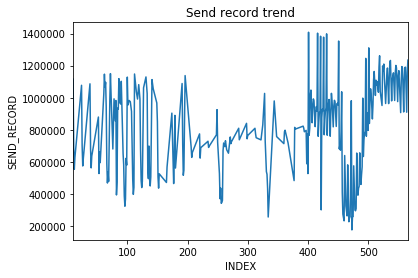

In [57]:
df_outlier_rem.SEND_RECORD.plot.line(y='SEND_RECORD')
plt.title('Send record trend')
plt.xlabel('INDEX')
plt.ylabel('SEND_RECORD')
#plt.savefig('SEND_RECORD_Trend.png')
## Here we can reset the index and plot only 56 values starting from 0 to 55

Text(0, 0.5, 'SEND_RECORD')

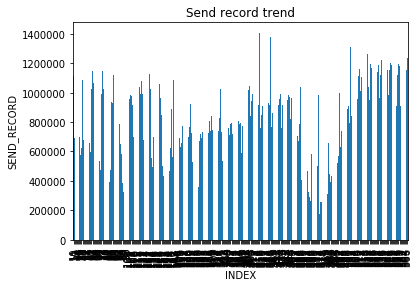

In [58]:
df_outlier_rem.SEND_RECORD.plot.bar(y='SEND_RECORD')
plt.title('Send record trend')
plt.xlabel('INDEX')
plt.ylabel('SEND_RECORD')

Text(0, 0.5, 'SEND_RECORD')

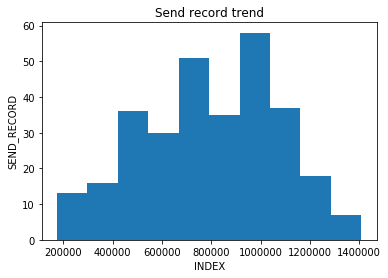

In [59]:
plt.hist(df_outlier_rem['SEND_RECORD'], histtype='bar')
plt.title('Send record trend')
plt.xlabel('INDEX')
plt.ylabel('SEND_RECORD')

In [60]:
df_size_pred = df_outlier_rem[["SEND_SQL", "SEND_DATA_ROW", "SEND_RECORD", "SIZE_IN_MB"]]

In [61]:
df_size_pred.head()

SEND_SQL  SEND_DATA_ROW  SEND_RECORD  SIZE_IN_MB
10  F5203001        1115962      1116139      909.04
11  F5203001         693875       694052      561.49
12  F5203001         552988       553165      450.02
13  F5203001         626844       627021      507.26
24  F5203001        1077227      1077404      878.11

In [62]:
df_size_pred.shape

(301, 4)

In [63]:
df_dummies=pd.get_dummies(df_size_pred.SEND_SQL)
df_dummies.head()

F4765101  F5203001
10         0         1
11         0         1
12         0         1
13         0         1
24         0         1

In [64]:
merged = pd.concat([df_size_pred,df_dummies],axis = 'columns')
merged.head()

SEND_SQL  SEND_DATA_ROW  SEND_RECORD  SIZE_IN_MB  F4765101  F5203001
10  F5203001        1115962      1116139      909.04         0         1
11  F5203001         693875       694052      561.49         0         1
12  F5203001         552988       553165      450.02         0         1
13  F5203001         626844       627021      507.26         0         1
24  F5203001        1077227      1077404      878.11         0         1

In [65]:
df_dummies_new = merged.drop(["SEND_SQL", "F5203001"],axis = 'columns')
df_dummies_new.head()

SEND_DATA_ROW  SEND_RECORD  SIZE_IN_MB  F4765101
10        1115962      1116139      909.04         0
11         693875       694052      561.49         0
12         552988       553165      450.02         0
13         626844       627021      507.26         0
24        1077227      1077404      878.11         0

In [66]:
df_dummies_new["F4765101"].value_counts()

1    151
0    150
Name: F4765101, dtype: int64

In [67]:
#df_dummies_new["SEND_SQL_F4765101"] = df_dummies_new["SEND_SQL_F4765101"].astype(int)
#df_dummies_new["SEND_SQL_F5203001"] = df_dummies_new["SEND_SQL_F5203001"].astype(int)
df_dummies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 10 to 566
Data columns (total 4 columns):
SEND_DATA_ROW    301 non-null int64
SEND_RECORD      301 non-null int64
SIZE_IN_MB       301 non-null float64
F4765101         301 non-null uint8
dtypes: float64(1), int64(2), uint8(1)
memory usage: 9.7 KB


In [69]:
X = df_dummies_new.drop(['SIZE_IN_MB', 'SEND_RECORD'],axis = 'columns')
X.head()

SEND_DATA_ROW  F4765101
10        1115962         0
11         693875         0
12         552988         0
13         626844         0
24        1077227         0

In [70]:
y = df_dummies_new.SIZE_IN_MB
y.head()

10    909.04
11    561.49
12    450.02
13    507.26
24    878.11
Name: SIZE_IN_MB, dtype: float64

In [71]:
X.tail()

SEND_DATA_ROW  F4765101
561        1188686         1
562        1190550         1
564         909061         1
565        1157222         1
566        1234330         1

In [72]:
y.tail()

561    773.13
562    774.35
564    591.26
565    752.67
566    802.82
Name: SIZE_IN_MB, dtype: float64

In [73]:
#Splitting Training and Test Set
#Since we have a very small dataset, we will train our model with all availabe data.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [74]:
#Fitting model with trainig data
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
# Saving model to disk
pickle.dump(regressor, open('IDRS Model.pkl','wb'))

In [82]:
# Loading model to compare the results
model = pickle.load(open('IDRS Model.pkl','rb'))
print(regressor.predict([[919262, 1]]))

[601.20840684]


In [78]:
regressor.score(X,y)

0.9880207759532309

In [ ]:
# ******************* END OF FILE *******************************#